In [1]:
import pyplotlib.pyplot as plot
import ROOT
import random
from IPython.display import Image, display

ROOT.gROOT.SetBatch(True)

In [2]:
def make_dummy_hist(hname,mean,sd,nEvents,opt=1):
    h = ROOT.TH1D(hname, hname, 200,0,200)
    for _ in range(nEvents):
        if opt==1:h.Fill(random.gauss(mean, sd))
        if opt==2:h.Fill(random.uniform(mean,sd))
    return h

In [3]:
h_bkg1 = make_dummy_hist("Bkg1",100,20,1000,opt=1)
h_bkg2 = make_dummy_hist("Bkg2",0,200,800,opt=2)
h_bkg3 = make_dummy_hist("Bkg3",80,50,700,opt=1)

h_signal= make_dummy_hist("signal",140,10,40)

# Create data = sum of backgrounds + Gaussian fluctuation
h_data=h_bkg1.Clone("Data")
for i in range(1, h_bkg1.GetNbinsX() + 1):
    y = h_bkg1.GetBinContent(i) + h_bkg2.GetBinContent(i) + h_bkg3.GetBinContent(i)
    fluct = random.gauss(0, ROOT.TMath.Sqrt(y)) if y > 0 else 0
    h_data.SetBinContent(i, y + fluct)
    h_data.SetBinError(i, ROOT.TMath.Sqrt(abs(y + fluct)))

#h_data  = make_dummy_hist("Data",110,20,30000)

In [4]:
plt = plot.Plotter()
plt.setExperiment("CMS")
plt.setExtraText("Work in progress")
plt.setEnergy("13 TeV")
plt.setYear("2018")
plt.setLumi("59.83")
plt.setPubStyle(False)
plt.show()
plt.debug=0

plot settings
Experiment:  CMS
ExtraText :  Work in progress
Energy    :  13 TeV
Year      :  2018
Luminosity:  59.83
PubStyle  :  False


### Example 1: stack plot

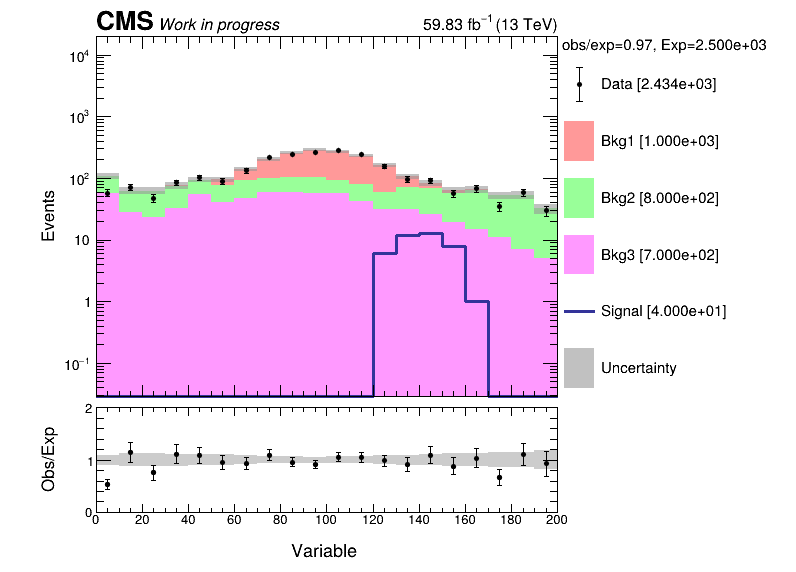

Info in <TCanvas::Print>: png file example.png has been created


In [5]:
plt.figure()
plt.hist(h_bkg1,color='ROOT.kRed-9',label="Bkg1",fill=True,stack=True)
plt.hist(h_bkg2,color='ROOT.kGreen-9',label="Bkg2",fill=True,stack=True)
plt.hist(h_bkg3,color='ROOT.kMagenta-9',label="Bkg3",fill=True,stack=True)
plt.hist(h_signal,color='ROOT.kBlue-2',label="Signal",lwidth=3,fill=False,stack=False)
plt.hist(h_data,color='ROOT.kBlack',label="Data",lwidth=1,ls=0.7,isData=True)
plt.set_xaxis("Variable",xrange=(0,200))
plt.set_yaxis("Events",yrange=(0.1,1E4))
plt.set_yaxis_ratio("Obs/Exp",yrange=(0,2))
plt.legend(fontsize=0.04,col=1)
plt.Draw(logY=True,rebin=10,unc_fstyle=1003,unc_fcolor=ROOT.kGray)
plt.savefig("example.png")
display(Image("example.png"))

### Example 1.1: Variable binning

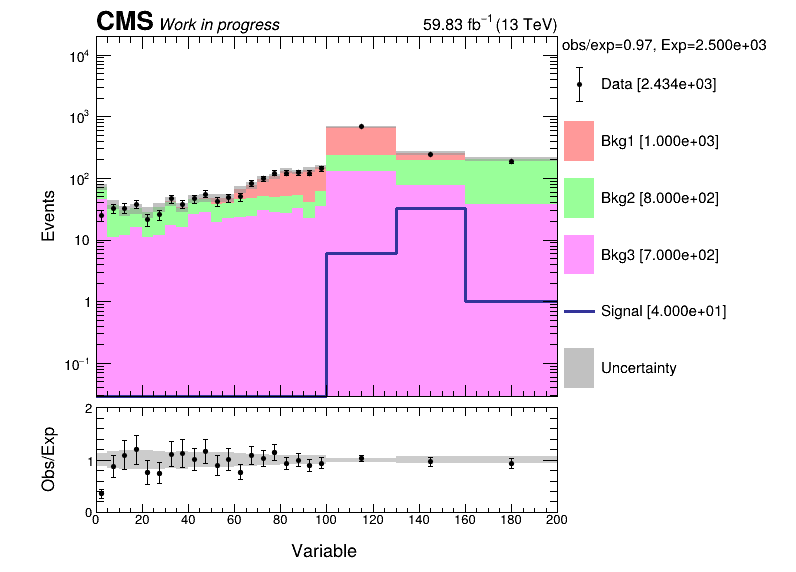

Info in <TCanvas::Print>: png file example.png has been created


In [6]:

rebin = list(range(0,101,5))+[130,160,200]

plt.figure(canvName="variable_stack_ratio")
plt.hist(h_bkg1,color='ROOT.kRed-9',label="Bkg1",fill=True,stack=True)
plt.hist(h_bkg2,color='ROOT.kGreen-9',label="Bkg2",fill=True,stack=True)
plt.hist(h_bkg3,color='ROOT.kMagenta-9',label="Bkg3",fill=True,stack=True)
plt.hist(h_signal,color='ROOT.kBlue-2',label="Signal",lwidth=3,fill=False,stack=False)
plt.hist(h_data,color='ROOT.kBlack',label="Data",lwidth=1,ls=0.7,isData=True)
plt.set_xaxis("Variable",xrange=(0,200))
plt.set_yaxis("Events",yrange=(0.1,1E4))
plt.set_yaxis_ratio("Obs/Exp",yrange=(0,2))
plt.legend(fontsize=0.04,col=1)
plt.Draw(logY=True,rebin=rebin,unc_fstyle=1003,unc_fcolor=ROOT.kGray)
plt.savefig("example.png")
display(Image("example.png"))

### Example 1.2: manual X-range (cutting on histogram content, not just visual)

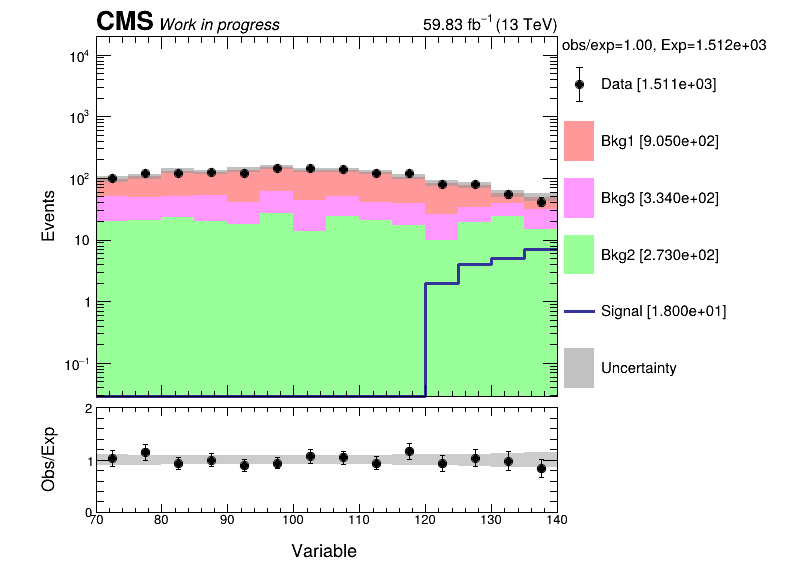

Info in <TCanvas::Print>: png file example.png has been created


In [7]:
plt.figure(canvName="truncate_Xrange")
plt.hist(h_bkg1,color='ROOT.kRed-9',label="Bkg1",fill=True,stack=True)
plt.hist(h_bkg2,color='ROOT.kGreen-9',label="Bkg2",fill=True,stack=True)
plt.hist(h_bkg3,color='ROOT.kMagenta-9',label="Bkg3",fill=True,stack=True)
plt.hist(h_signal,color='ROOT.kBlue-2',label="Signal",lwidth=3,fill=False,stack=False)
plt.hist(h_data,color='ROOT.kBlack',label="Data",lwidth=1,ls=0.7,isData=True)
plt.set_xaxis("Variable",xrange=(70,140))
plt.set_yaxis("Events",yrange=(0.1,1E4))
plt.set_yaxis_ratio("Obs/Exp",yrange=(0,2))
plt.legend(fontsize=0.04,col=1)
plt.Draw(logY=True,rebin=5,unc_fstyle=1003,unc_fcolor=ROOT.kGray,truncate_xrange=True)
plt.savefig("example.png")
display(Image("example.png"))
##For just visual: truncate_xrange=False
## notice how histo integral changes in bracket

### Example 2: stack and signal, no data

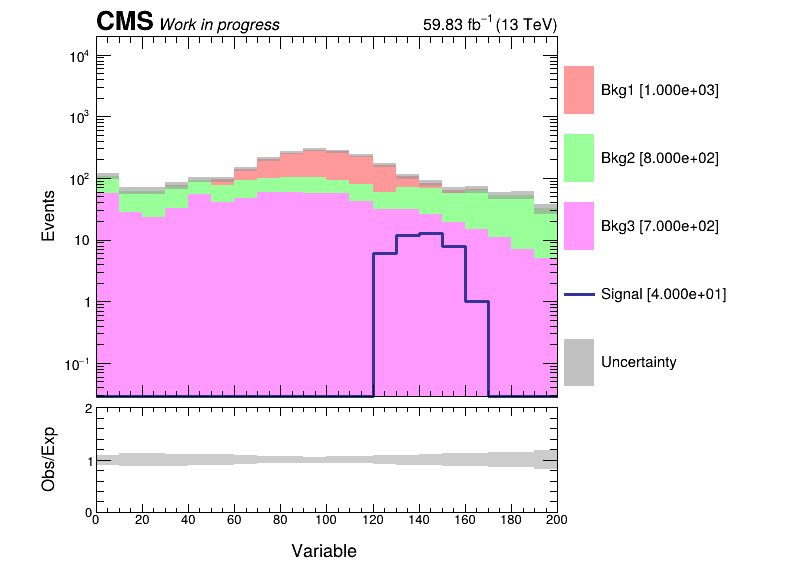

Info in <TCanvas::Print>: png file example.png has been created


In [8]:
plt.figure(canvName="stack_signal")
plt.hist(h_bkg1,color='ROOT.kRed-9',label="Bkg1",fill=True,stack=True)
plt.hist(h_bkg2,color='ROOT.kGreen-9',label="Bkg2",fill=True,stack=True)
plt.hist(h_bkg3,color='ROOT.kMagenta-9',label="Bkg3",fill=True,stack=True)
plt.hist(h_signal,color='ROOT.kBlue-2',label="Signal",lwidth=3,fill=False,stack=False)
#plt.hist(h_data,color='ROOT.kBlack',label="Data",lwidth=1,ls=0.7,isData=True)
plt.set_xaxis("Variable",xrange=(0,200))
plt.set_yaxis("Events",yrange=(0.1,1E4))
plt.set_yaxis_ratio("Obs/Exp",yrange=(0,2))
plt.legend(fontsize=0.04,col=1)
plt.Draw(logY=True,rebin=10,unc_fstyle=1003,unc_fcolor=ROOT.kGray)
plt.savefig("example.png")
display(Image("example.png"))

### Example 3: Overlay plot

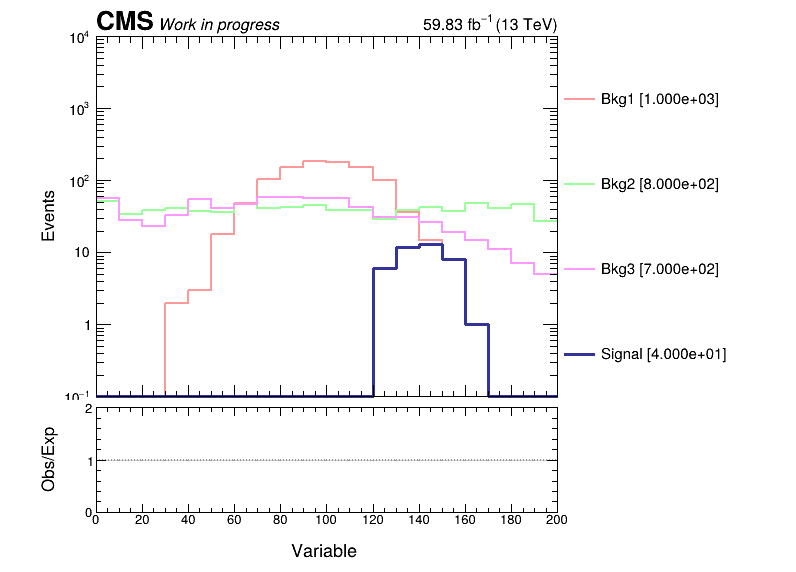

Info in <TCanvas::Print>: png file example.png has been created


In [9]:
plt.figure(canvName="overlay")
plt.hist(h_bkg1,color='ROOT.kRed-9',label="Bkg1",fill=False,stack=False)
plt.hist(h_bkg2,color='ROOT.kGreen-9',label="Bkg2",fill=False,stack=False)
plt.hist(h_bkg3,color='ROOT.kMagenta-9',label="Bkg3",fill=False,stack=False)
plt.hist(h_signal,color='ROOT.kBlue-2',label="Signal",lwidth=3,fill=False,stack=False)
#plt.hist(h_data,color='ROOT.kBlack',label="Data",lwidth=1,ls=0.7,isData=True)
plt.set_xaxis("Variable",xrange=(0,200))
plt.set_yaxis("Events",yrange=(0.1,1E4))
plt.set_yaxis_ratio("Obs/Exp",yrange=(0,2))
plt.legend(fontsize=0.04,col=1)
plt.Draw(logY=True,rebin=10,unc_fstyle=1003,unc_fcolor=ROOT.kGray)
plt.savefig("example.png")
display(Image("example.png"))

### Publication Style

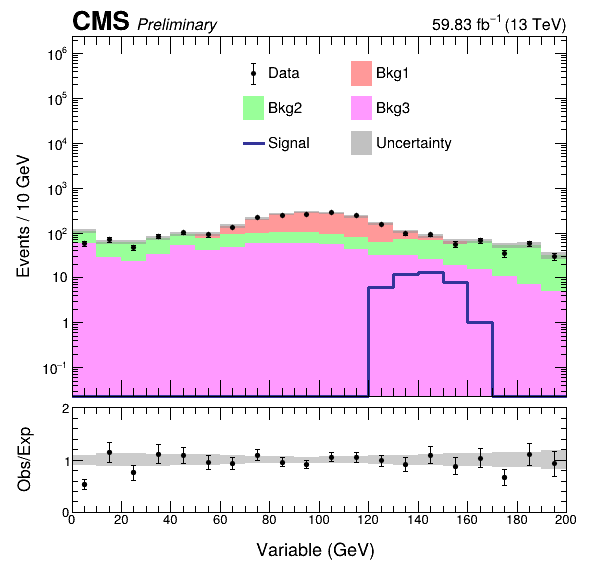

Info in <TCanvas::Print>: png file example.png has been created


In [10]:


plt.setPubStyle(True)
plt.setExtraText("Preliminary")

plt.figure(canvName="pubstyle-stack-ratio")
plt.hist(h_bkg1,color='ROOT.kRed-9',label="Bkg1",fill=True,stack=True)
plt.hist(h_bkg2,color='ROOT.kGreen-9',label="Bkg2",fill=True,stack=True)
plt.hist(h_bkg3,color='ROOT.kMagenta-9',label="Bkg3",fill=True,stack=True)
plt.hist(h_signal,color='ROOT.kBlue-2',label="Signal",lwidth=3,fill=False,stack=False)
plt.hist(h_data,color='ROOT.kBlack',label="Data",lwidth=1,ls=0.7,isData=True)
plt.set_xaxis("Variable (GeV)",xrange=(0,200))
plt.set_yaxis("Events / 10 GeV",yrange=(0.1,1E6))
plt.set_yaxis_ratio("Obs/Exp",yrange=(0,2))
plt.legend(pos=[0.40,0.60,0.80,0.86],fontsize=0.04,col=2)
plt.Draw(logY=True,rebin=10,unc_fstyle=1003,unc_fcolor=ROOT.kGray,extraTextOffset=0.09)
plt.savefig("example.png")
display(Image("example.png"))